In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [7]:
plt.style.use('seaborn')

In [28]:
df = pd.read_csv(r'C:\Users\fabio\Documents\DataSets\csv_data\master.csv')

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


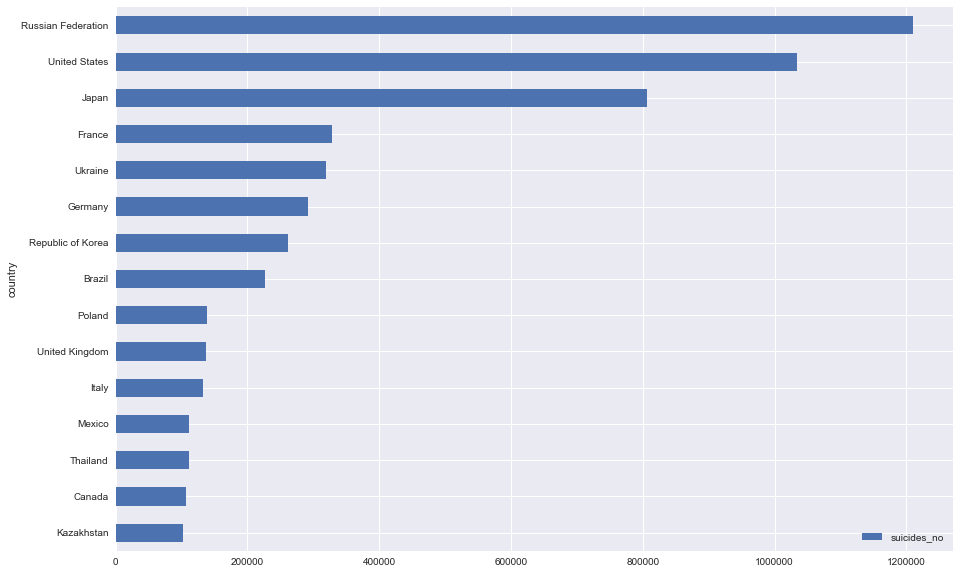

In [8]:
df.groupby(['country']).aggregate(sum).suicides_no.reset_index().sort_values(['suicides_no'], ascending=True).tail(15).plot(kind='barh', x='country', y='suicides_no', figsize=(15, 10))

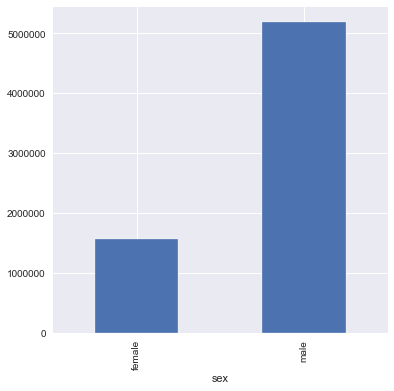

In [67]:
df.groupby(['sex']).aggregate(sum).suicides_no.plot(kind='bar', figsize=(6, 6))

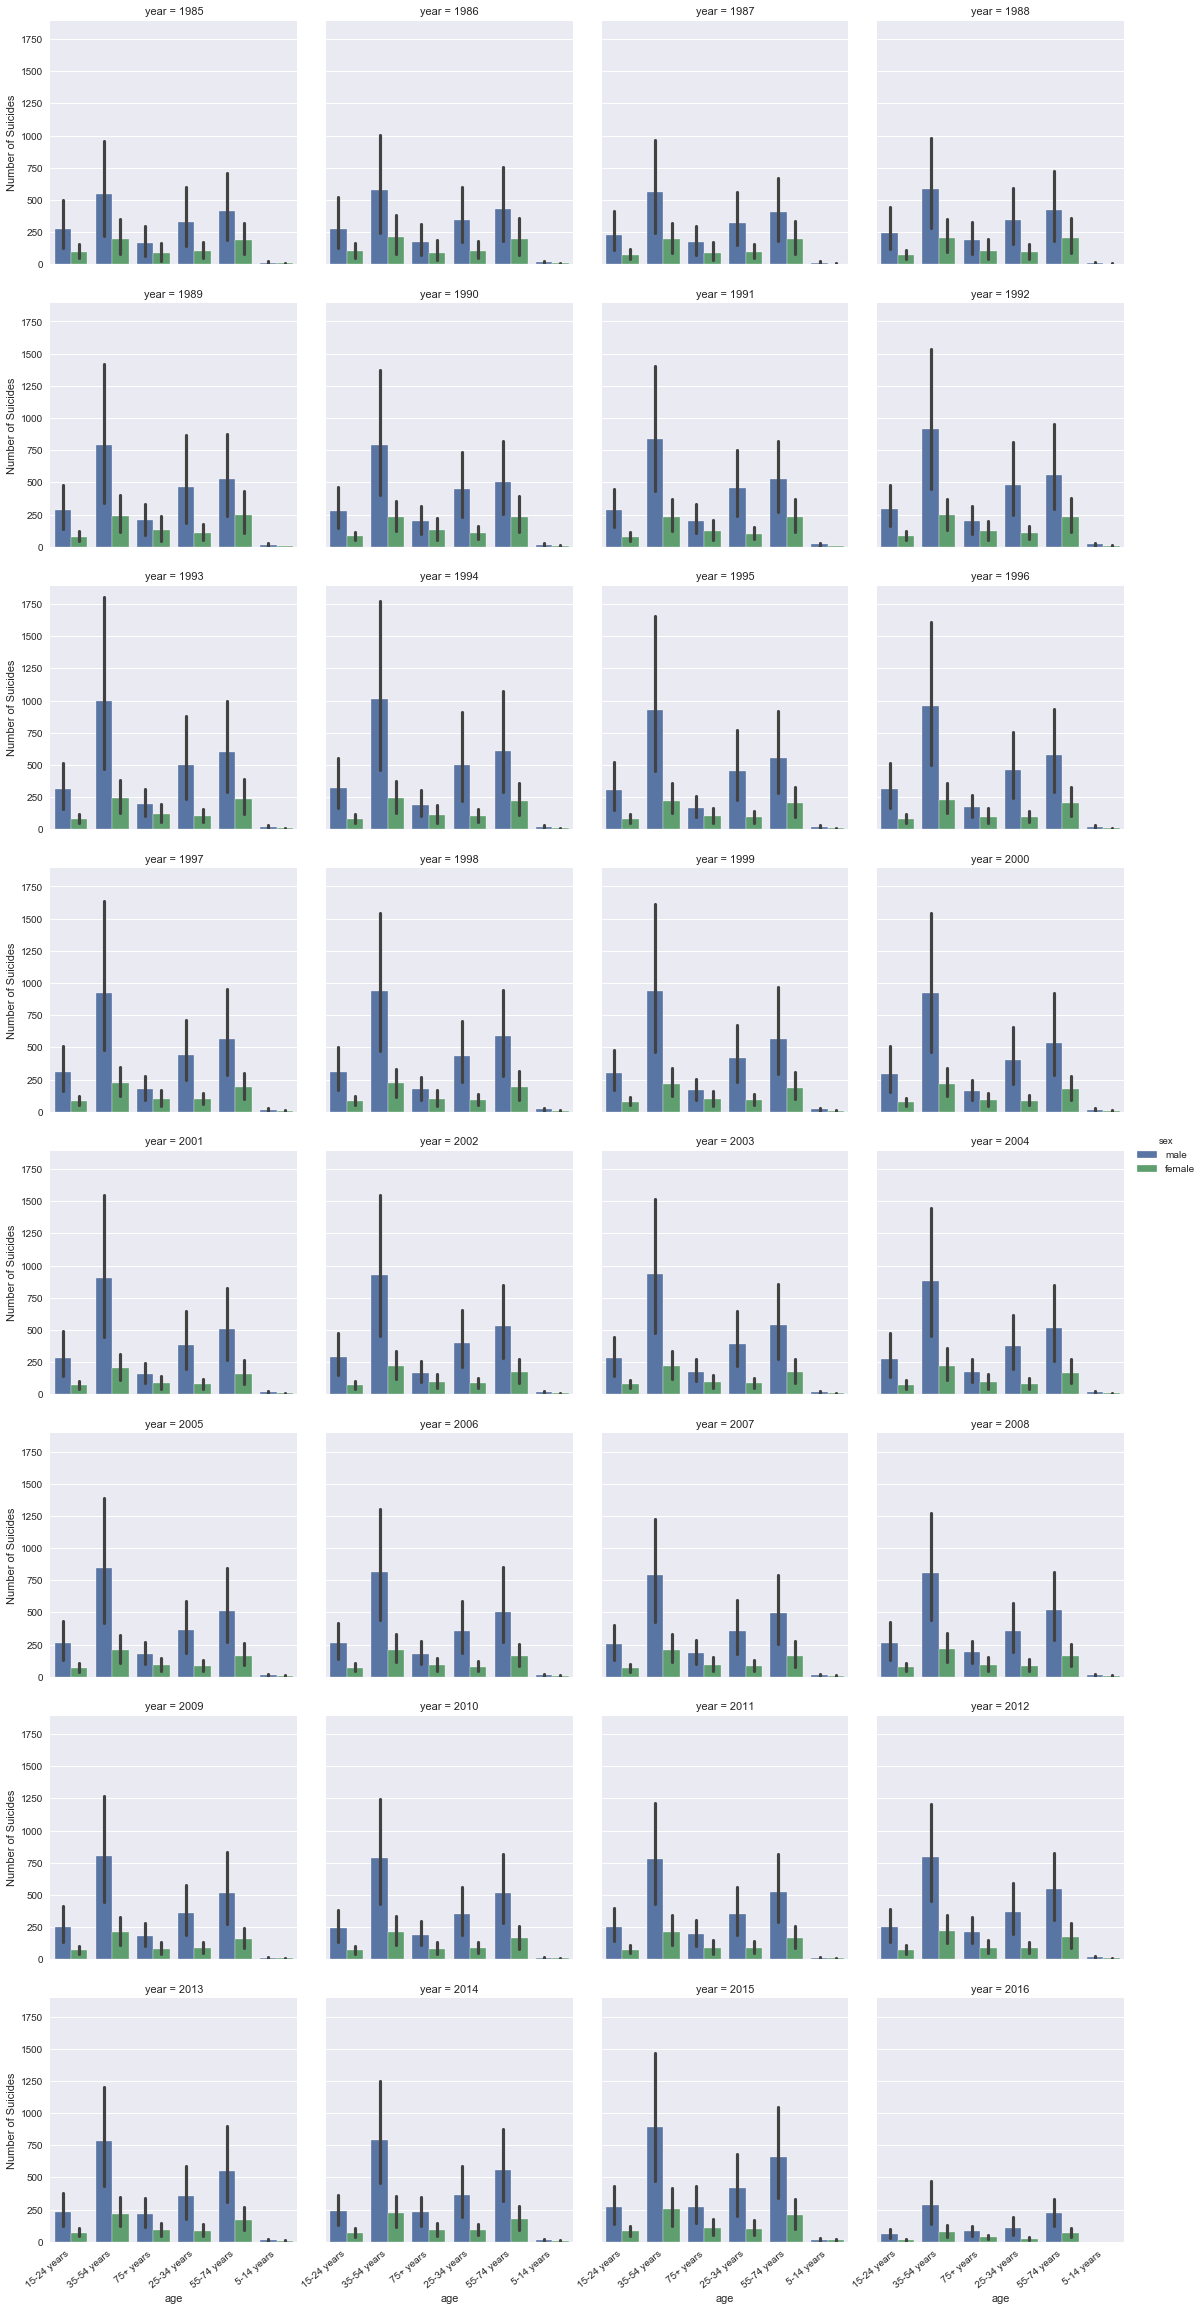

In [69]:
ax = sns.catplot(x='age', y='suicides_no', col='year', hue='sex', data=df, kind='bar', height=4, col_wrap=4)
ax.set_xticklabels(rotation=40, ha="right")
ax.set_ylabels("Number of Suicides")

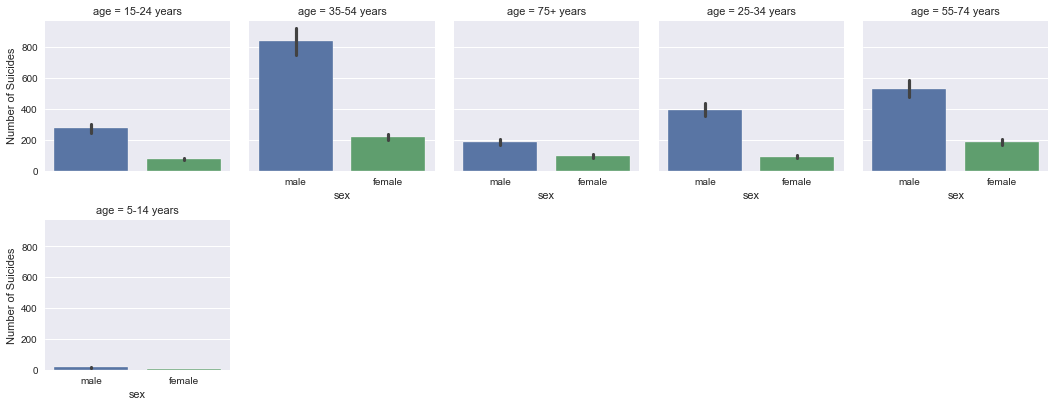

In [72]:
ax = sns.catplot(x='sex', y='suicides_no', col='age', data=df, kind='bar', height=3, col_wrap=5)
ax.set_ylabels('Number of Suicides')
plt.tight_layout()

In [14]:
col_map = {'female': int(0), 'male': int(1)}
df['sex'] = df['sex'].map(col_map)

In [15]:
col_rename = {df.columns[9] : 'GDP for year', df.columns[10] : 'GDP per capita'}
df = df.rename(columns=col_rename)

In [16]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,GDP for year,GDP per capita,generation
0,Albania,1987,1,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,1,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,0,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,1,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,1,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [17]:
def replace(value):
    return value.replace(',', '')

In [18]:
df['GDP for year'] = (df['GDP for year'].apply(replace)).astype(np.int64)

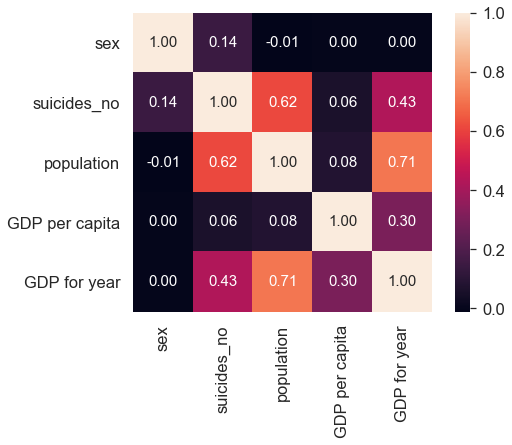

In [19]:
#Correlation Matrix
cols = ['sex', 'suicides_no', 'population', df.columns[10], df.columns[9]]
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
heat_map = sns.heatmap(cm,
                      cbar=True,
                      annot=True,
                      square=True,
                      fmt='.2f',
                      annot_kws={'size': 15},
                      yticklabels=cols,
                      xticklabels=cols)
plt.show()

C:\Users\fabio\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\fabio\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


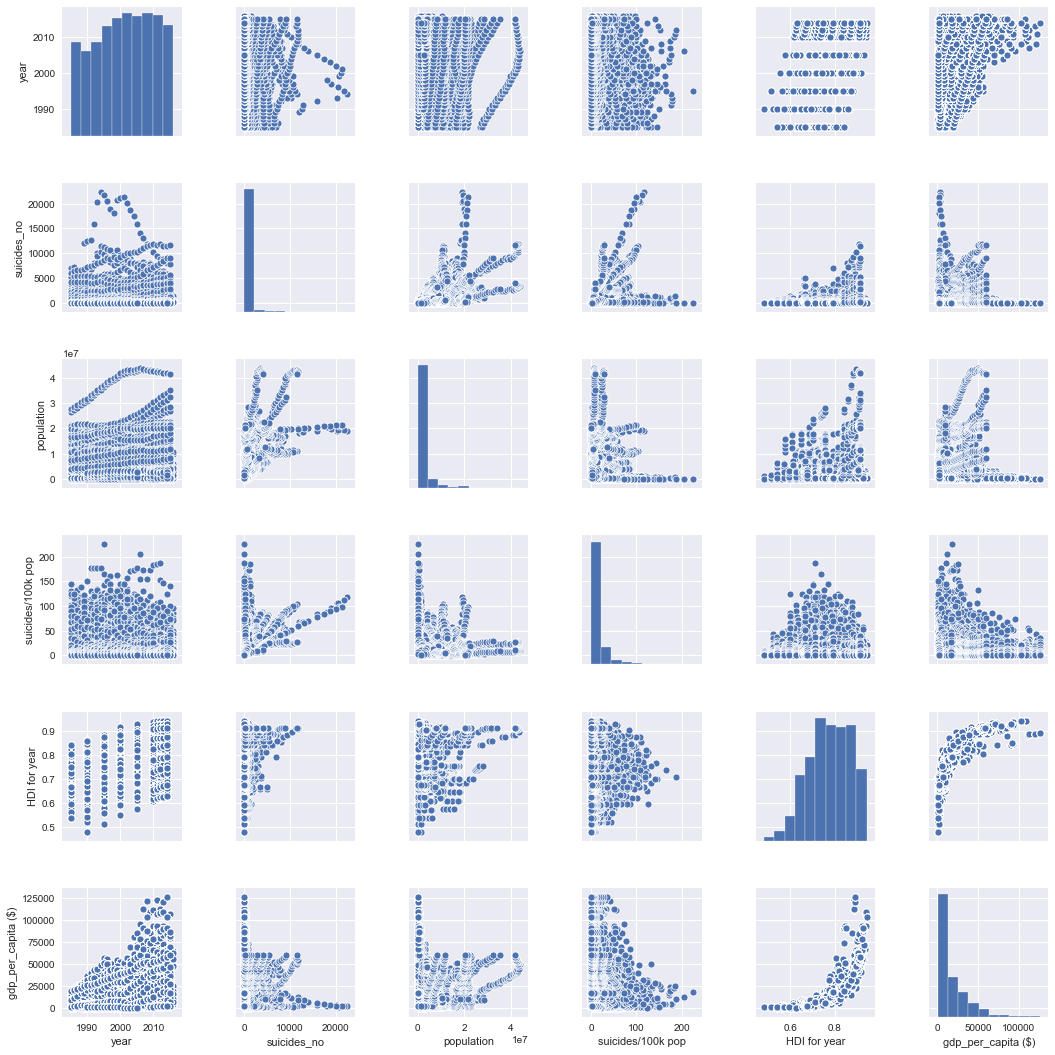

In [29]:
sns.pairplot(data=df)
plt.tight_layout()

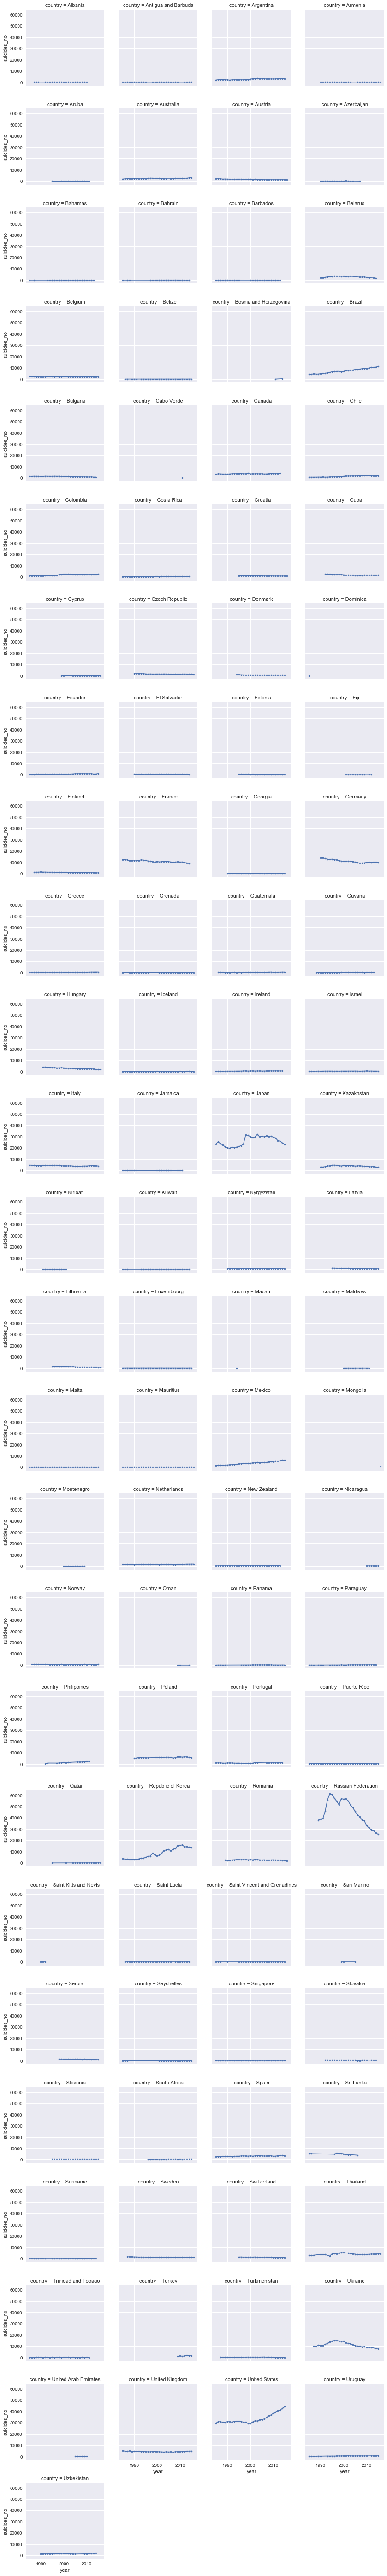

In [30]:
data_g = df.groupby(['country', 'year']).sum().suicides_no.reset_index()
g = sns.FacetGrid(data=data_g, col='country', height=3, aspect=1, col_wrap=4)
g.map(plt.plot, 'year', 'suicides_no', marker='.')

In [33]:
df = pd.read_csv(r'C:\Users\fabio\Documents\DataSets\csv_data\master.csv')

In [34]:
categories_a = list(df.groupby(['sex'])['suicides_no'].sum().index)
categories_b = list(df.groupby(['age'])['suicides_no'].sum().index)
categories_c = list(df.groupby(['country'])['suicides_no'].sum().nlargest(6).index)
categories_d = list(df.groupby(['generation'])['suicides_no'].sum().index)

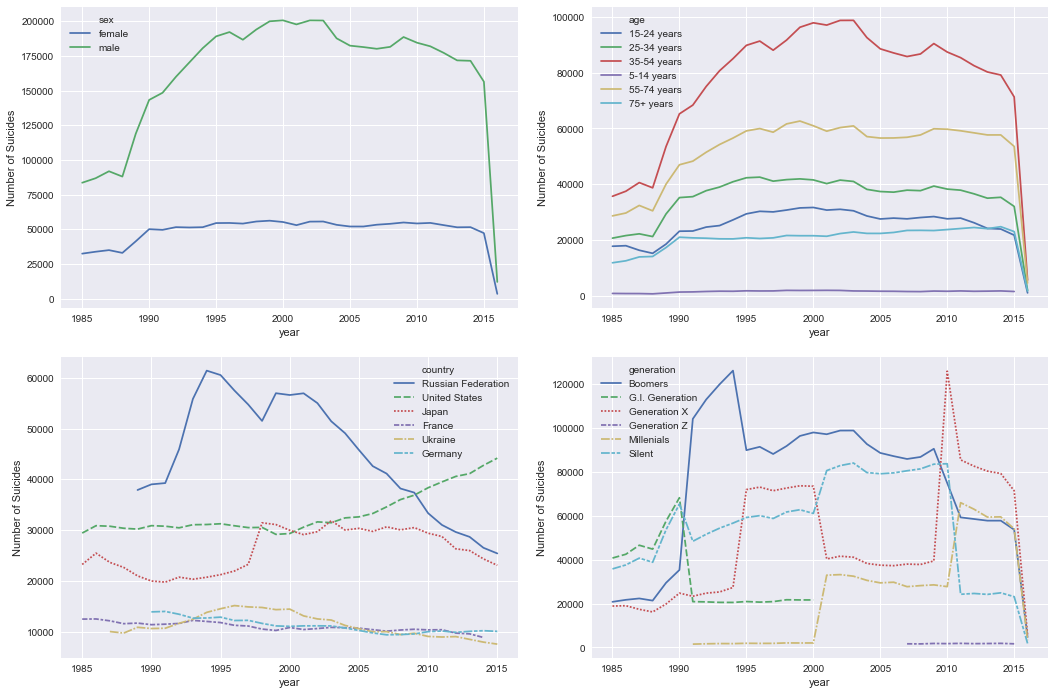

In [56]:
from matplotlib.colors import LogNorm
from numpy import median
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
columns = ['sex', 'age', 'country', 'generation']
categories = [categories_a, categories_b, categories_c, categories_d]
index = [axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]]
value=False
for col, catg, pos in zip(columns, categories, index):
    data_g = df.groupby(['year', col])['suicides_no'].sum().reset_index()
    data_g[col] = data_g[col].astype(pd.api.types.CategoricalDtype(categories=catg))
    if col is ('generation' and 'country'): value=True
    ax = sns.lineplot(x='year', y='suicides_no', hue=col, style=col, hue_norm=LogNorm(), estimator=median, data=data_g, sort=False, dashes=value, ax=pos)
    ax.set_ylabel("Number of Suicides")

plt.tight_layout()    
plt.style.use('seaborn')
plt.show()    